# Exploratory Data Analysis
- draw histogram for star, issue, pull, fork, branch, and release
- table to compare ml_module created time and bq content time

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [5]:
df = pd.read_csv('df_commit_v3.csv')
df.head()

,repo,commit_year,commit_month,datetime,ml_commit,commit_count,fork_count,release_count,pulls_count,branch_count,...,haveScrapy,haveLime,havePattern,haveMetric_learn,haveMars,haveNetwork,haveCaffee,haveSympy,haveMxnet,haveAstropy
0,18F/rdbms-subsetter,2014,10,2014-10-01,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18F/rdbms-subsetter,2014,11,2014-11-01,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18F/rdbms-subsetter,2014,12,2014-12-01,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18F/rdbms-subsetter,2015,1,2015-01-01,NaN,5.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18F/rdbms-subsetter,2015,2,2015-02-01,NaN,8.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add columns for diff in diff

In [9]:
df['log_commit'] = np.log(df['commit_count']+ .1) # ln transformation
df['log_fork'] = np.log(df['fork_count']+.1)
df['log_release'] = np.log(df['release_count']+.1)
df['log_branch'] = np.log(df['branch_count']+.1)
df['log_issue'] = np.log(df['issue_count']+.1)
df['log_pull'] = np.log(df['pulls_count']+.1)
df['log_fork'] = np.log(df['fork_count']+.1)
df['log_stargazer'] = np.log(df['stargazer_count']+.1)

df['company'] = df['repo'].apply(lambda x: x.split('/')[0]) # get repo's company

In [12]:
df.rename(columns = {'pulls_count': 'pull_count'}, inplace = True)

In [64]:
df.to_csv('df_commit_v3.csv', index = False)

In [16]:
df.repo.nunique()

498

### Historgram of counts

/home/yt9mh/.conda/envs/elle/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/yt9mh/.conda/envs/elle/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


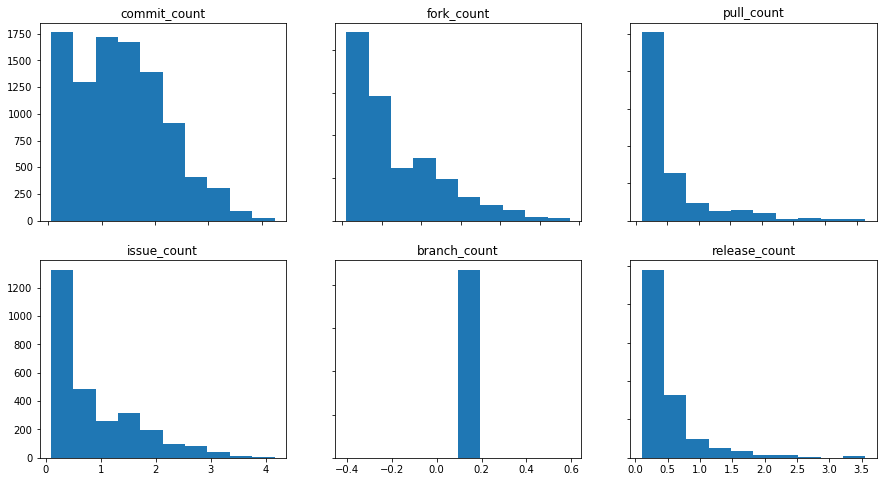

In [18]:
fig, axs = plt.subplots(2, 3,figsize=(15,8))


# axs[0, 0].hist(df['commit_count'])
axs[0, 0].hist(df['log_commit'])
axs[0, 0].set_title('commit_count')
# axs[0, 1].hist(final['fork_count'])
axs[0, 1].hist(df['log_fork'])
axs[0, 1].set_title('fork_count')
# axs[0, 2].hist(df['pull_count'])
axs[0, 2].hist(df['log_pull'])
axs[0, 2].set_title('pull_count')
# axs[1, 0].hist(df['issue_count'])
axs[1, 0].hist(df['log_issue'])
axs[1, 0].set_title('issue_count')
# axs[1, 1].hist(df['branch_count'])
axs[1, 1].hist(df['log_branch'])
axs[1, 1].set_title('branch_count')
# axs[1, 2].hist(df['release_count'])
axs[1, 2].hist(df['log_release'])
axs[1, 2].set_title('release_count')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()





### Repo using ml module created time and commit time

In [26]:
time = pd.read_csv('time_diff_v3.csv')

In [22]:
def to_datetime(df, col):
    df[col] = pd.to_datetime(df[col])


In [40]:
[to_datetime(time, i) for i in list(time)[1:5]]

[None, None, None, None]

### How many repo is bq time more closer to last commit time?

calculate no machine learning bq-create time 

In [41]:
time['bq-ml'] = round((time['ml_commit_first'] - time['bq_content_first'])/ np.timedelta64(1, 'M'))
time['first-bq'] = round((time['bq_content_first'] - time['first_commit'])/ np.timedelta64(1, 'M'))
time['bq-last'] = round((time['last_commit'] - time['bq_content_first'])/ np.timedelta64(1, 'M'))
time

,repo,bq_content_first,ml_commit_first,first_commit,last_commit,bq-ml,first-bq,bq-last
0,18F/rdbms-subsetter,2017-10-01,2017-10-01,2014-10-01,2017-12-01,0.0,36.0,2.0
1,6aika/issue-reporting,2016-02-01,2016-11-01,2016-02-01,2017-05-01,9.0,0.0,15.0
2,Asana/bazel,2015-02-01,2016-03-01,2015-02-01,2017-03-01,13.0,0.0,25.0
3,Asana/boto,2006-08-01,2014-07-01,2006-08-01,2016-03-01,95.0,0.0,115.0
4,Autodesk/molecular-design-toolkit,2016-06-01,2016-07-01,2016-05-01,2017-12-01,1.0,1.0,18.0
...,...,...,...,...,...,...,...,...
493,yahoo/TensorFlowOnSpark,2017-01-01,2018-05-01,2017-01-01,2020-03-01,16.0,0.0,38.0
494,yahoo/lopq,2015-12-01,2015-12-01,2015-12-01,2017-12-01,0.0,0.0,24.0
495,yahoo/serviceping,2015-05-01,2017-01-01,2015-05-01,2020-03-01,20.0,0.0,58.0
496,zadgroup/edx-platform,2011-12-01,2013-05-01,2011-12-01,2015-07-01,17.0,0.0,43.0


In [42]:
late = time[time['first-bq'] > time['bq-last']]
late.head()

,repo,bq_content_first,ml_commit_first,first_commit,last_commit,bq-ml,first-bq,bq-last
0,18F/rdbms-subsetter,2017-10-01,2017-10-01,2014-10-01,2017-12-01,0.0,36.0,2.0
5,Brilliant/sinaweibo_crawler,2015-03-01,2015-03-01,2015-01-01,2015-03-01,0.0,2.0,0.0
13,DataDog/vbench,2013-06-01,2013-06-01,2011-11-01,2013-07-01,0.0,19.0,1.0
23,MateLabs/All-Conv-Keras,2017-06-01,2017-06-01,2017-03-01,2017-08-01,0.0,3.0,2.0
35,Runscope/graphite-beacon,2015-09-01,2015-09-01,2014-10-01,2015-09-01,0.0,11.0,0.0


### Average created_at for late

In [47]:
late_year = late['first_commit'].apply(lambda x: x.year)
# late_year.value_counts()

In [48]:
all_year = time['first_commit'].apply(lambda x: x.year)
# all_year.value_counts()

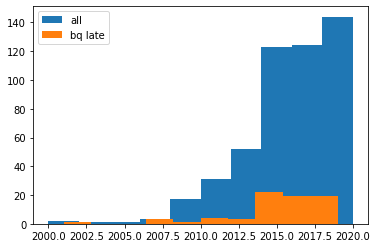

In [49]:
plt.hist(all_year, label = 'all')
plt.hist(late_year, label = 'bq late')
plt.legend();

## Month difference between bq content record and ml commit

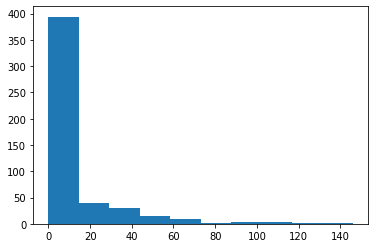

In [51]:
plt.hist(time['bq-ml']);

### Statistic

 number  | have ml |
------| ---- | 
company | 150 | 
repo | 498 | 